In [4]:
from manim import *

video_scene = " -v WARNING --progress_bar None --disable_caching coriolis_earth_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s coriolis_earth_Scene"

In [59]:
class CoriolisEarth(Mobject):
    def __init__(self, center, xy_range, xy_length, **kwargs):
        super().__init__(**kwargs)
        
		

class CoriolisAx(Mobject):
	def __init__(self, center, omega_z_length, v_length, c_length, theta, c_angle, **kwargs):
		super().__init__(**kwargs)

		self.center = center
		self.omega_z_end = self.center + omega_z_length*UP/2
		self.off_theta = PI/2 - theta
		self.v_end = self.omega_z_end + v_length*np.array([-np.sin(self.off_theta), -np.cos(self.off_theta), 0])
		self.v_orth_end = np.array([self.omega_z_end[0], self.v_end[1], 0])
            
		self.omega_proj_length = omega_z_length*v_length * np.cos(theta)						# dot product of 'omega' and 'velocity'
		self.c_length = v_length*self.omega_proj_length * np.sin(theta) / 4				# cross product of 'omega projection' and 'velocity' (scaled with 1/4)

		# angular velocity of the earth
		omega_z_line = Line(start = self.center - omega_z_length*UP/2, end = self.omega_z_end, color = BLACK, stroke_width = 4).add_tip(tip_length = 0.25, tip_width = 0.25)
		omega_z_line_label = Tex(r"$\Vec{\omega}$", color = BLACK).next_to(omega_z_line, UP+RIGHT, buff = 0.125)
		self.add(omega_z_line, omega_z_line_label)
        # velocity of the mass
		v_line = Line(start = self.omega_z_end, end = self.v_end, color = GRAY, stroke_width = 2).add_tip(tip_length = 0.25, tip_width = 0.25)
		v_line_label = Tex(r"$\Vec{v}$", color = GRAY).next_to(self.v_end, UP+LEFT, buff = 0.125)
		v_vert_line = DashedLine(start = self.v_end, end = self.v_orth_end, color = GRAY, stroke_width = 2)
		self.add(v_line, v_line_label, v_vert_line)
        # resulting coriolis force
		c_polygon = Polygon(self.omega_z_end, self.v_end, self.v_orth_end, fill_color = PURE_RED, stroke_opacity = 0, fill_opacity = 0.25)
		c_line = Line(start = self.v_orth_end, end = self.v_orth_end + self.c_length*np.array([np.cos(c_angle), np.sin(c_angle), 0]), color = PURE_RED, stroke_width = 2).add_tip(tip_length = 0.25, tip_width = 0.25)
		c_line_label = Tex(r"$\Vec{v}$", color = PURE_RED).next_to(c_line, UP+RIGHT, buff = 0.125)
		self.add(c_polygon, c_line, c_line_label)

Manim Community v0.18.1

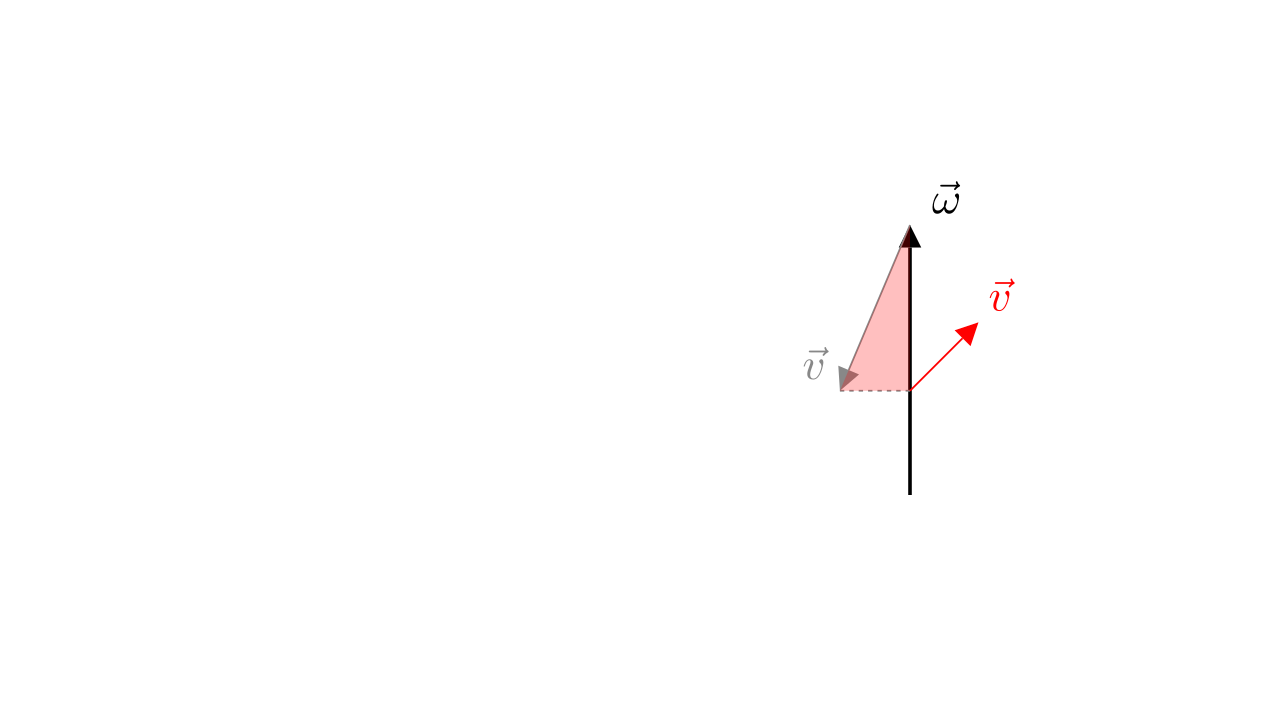

In [60]:
%%manim -qm --fps 60 $video_scene


class coriolis_earth_Scene(Scene):
	def construct(self):
		self.camera.background_color = WHITE

		ax_center = np.array([3, 0, 0])

		coriolis_ax = CoriolisAx(ax_center, 3, 2, 2, PI/2 - 0.4, PI/4)
		self.add(coriolis_ax)